### Advent Of Code Day 12: Passage Pathing

**Part One**

At first, create the cave mapping.

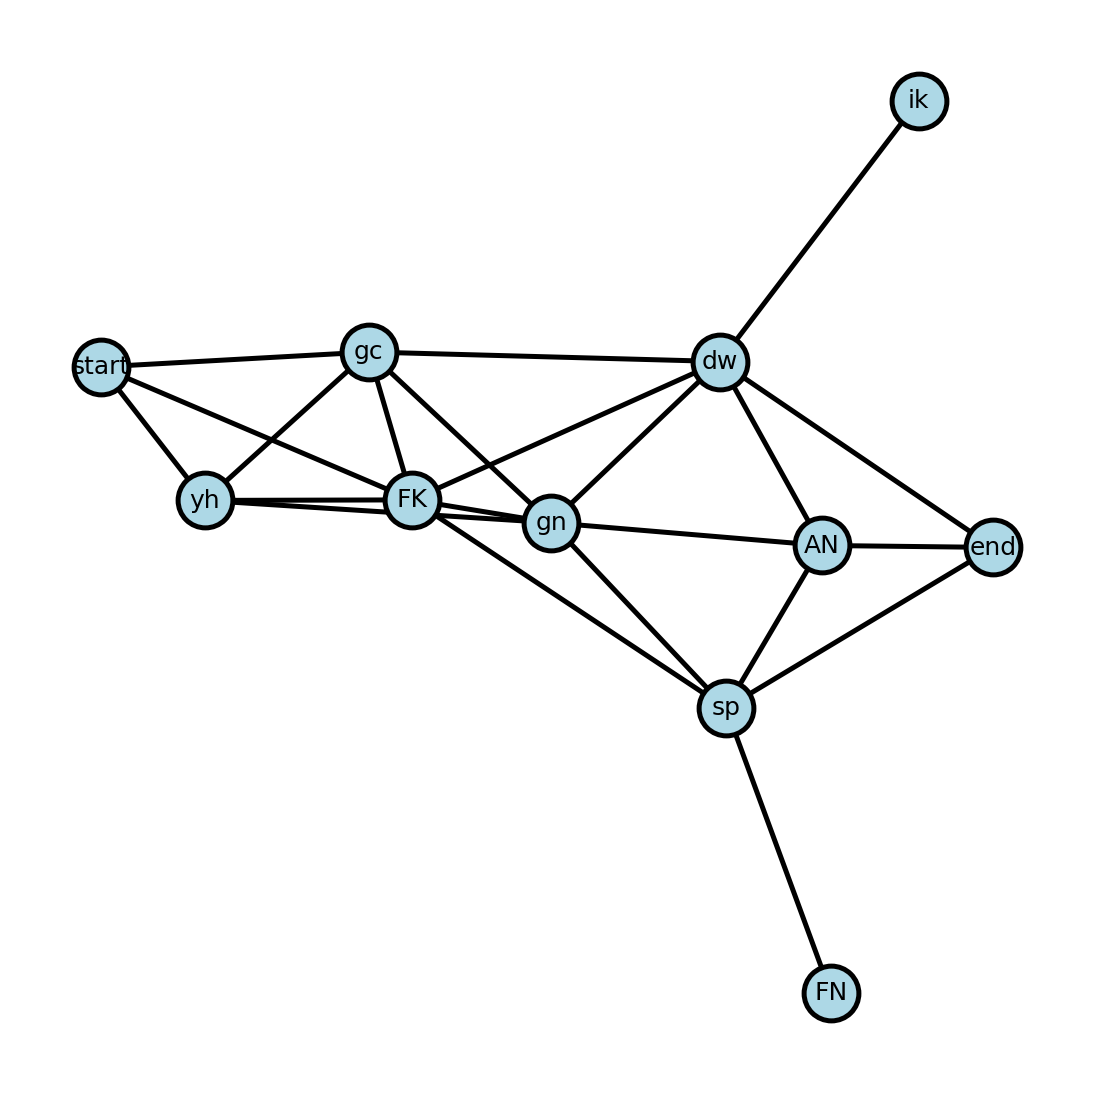

In [39]:
import matplotlib.pyplot as plt
import networkx as nx

caveGraph = nx.Graph()

with open("./input") as file:
    for line in file:
        node1, node2 = line.split("-")[0], line.split("-")[1][:-1]
        caveGraph.add_edge(node1, node2)


options = {
    "font_size": 25,
    "node_size": 3000,
    "node_color": "lightblue",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}

plt.figure(figsize=(15,15))
nx.draw(caveGraph, with_labels = True, **options)

In [40]:
class Queue:
    "A container with a first-in-first-out (FIFO) queuing policy."
    def __init__(self):
        self.list = []

    def push(self,item):
        "Enqueue the 'item' into the queue"
        self.list.insert(0,item)

    def pop(self):
        """
          Dequeue the earliest enqueued item still in the queue. This
          operation removes the item from the queue.
        """
        return self.list.pop()

    def isEmpty(self):
        "Returns true if the queue is empty"
        return len(self.list) == 0

**How can we compute all the possible paths?**

Breath First search travels across all the possible cave connections (edges) and only considers caves if not visited earlier in **any** way or possible path made up to that time. 

The difference here is that you should consider the next possible cave whether if it's a bigger one without restrictions or it's a smaller cave and it hasn't been visited earlier **but only along the unique path or caves combination you have crossed** in order to find the smaller cave.

It can be thought as doubling yourself in each corner to take all the paths but not having the needed walky-talky required to share the information of the visited paths so far with your mates (i.e, BFS without visiting set).

In [41]:
def getNumberOfPaths(G, origin, destiny):
    """ Return all the possible paths along the cave maze. """
    
    container = Queue() # Breath First traversal (no visiting set)
    container.push((origin, []))

    possiblePaths = 0

    # While you (or any of your doubles) keep exploring the maze, 
    while not container.isEmpty():

        # Next double facing his next cave
        node, path = container.pop()

        # If you (the double) have found the exit, count your path
        if node == destiny: possiblePaths += 1

        else:

            # If not, visit the next cave only if it hasn't been visited by you earlier
            # or it's a bigger one
            if node.isupper() or node not in path: 
                path.append(node)

                # For each possible next cave to visit, 
                for neighbor in G.neighbors(node):

                    # Duplicate yourself for taking each possible path 
                    container.push((neighbor, path.copy()))

    return possiblePaths

In [42]:
getNumberOfPaths(caveGraph, 'start', 'end')

3713

**Part Two:**

The same as before, but consider visiting only one small cave twice for each possible path.

In [45]:
def getNumberOfPaths2(G, origin, destiny):
    """ Return all the possible paths along the cave maze. """
    
    container = Queue() # Breath First traversal (no visiting set)
    container.push((origin, [], False))

    possiblePaths = 0

    # While you (or any of your doubles) keep exploring the maze, 
    while not container.isEmpty():

        # Next double facing his next cave
        node, path, twice = container.pop()

        # If you (the double) have found the exit, count your path
        if node == destiny: possiblePaths += 1

        else:

            # If not, visit the next cave only if its a larger one or if it hasn't been visited,
            # or it's a smaller one and you have time to visit it again (because you haven't visit 
            # any cave twice in the past). The latter applies for caves different than the origin.
            
            if node.isupper() or node not in path or not twice: 

                # Update the twice condition before visiting
                twice = twice or (node.islower() and node in path)
                path.append(node)

                # For each possible next cave to visit (not the start)
                for neighbor in G.neighbors(node):

                    if neighbor != origin:

                        # Duplicate yourself for taking the next cave
                        container.push((neighbor, path.copy(), twice))

    return possiblePaths

In [44]:
# Really poor efficiency, it takes about 2 minutes in my laptop (but it still work)
getNumberOfPaths2(caveGraph, 'start', 'end')

91292